In [31]:
import matplotlib.pyplot`````````` as plt
import tensorflow as tf
import numpy as np
import cv2

In [3]:
interpreter = tf.lite.Interpreter(model_path="../releases/pose/mobilenetv1-075.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
print(input_details)

[{'name': 'sub_2', 'index': 97, 'shape': array([  1, 353, 257,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0)}]


(353, 257, 3)


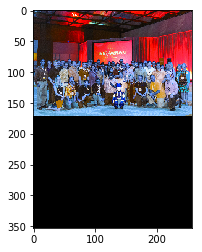

In [37]:
im = cv2.imread("image1.jpeg")
im = im.astype(np.float32)
def resize_add_padding(im, t_h, t_w):
    '''
    Resizes an image to a target size, adding padding if necessary to maintain
    the aspect ratio
    - Arguments:
        - im (np.array): shape (h, w, 3)
        - t_h (int): target height
        - t_w (int): target width
    '''
    min_idx = [t_h, t_w].index(min(t_h, t_w))
    ratio = [t_h, t_w][min_idx] / im.shape[min_idx]
    new_im = np.zeros((t_h, t_w, 3), dtype = im.dtype)
    res_h, res_w = int(im.shape[0] * ratio), int(im.shape[1] * ratio)
    res_im = cv2.resize(im, (res_w, res_h))
    new_im[:res_h, :res_w, :] = res_im
    return new_im

new_im = resize_add_padding(im, 353, 257)
plt.imshow(new_im.astype(int))
print(new_im.shape)
output_details = interpreter.get_output_details()

In [38]:
new_im = np.expand_dims(new_im, 0)


In [39]:
interpreter.set_tensor(input_details[0]['index'], new_im)
interpreter.invoke()
output = interpreter.get_tensor(output_details[0]['index'])

In [40]:
output.shape

(1, 23, 17, 17)

In [21]:
name_to_index_d = {name : index for (a['name'], a['index']) in input_details}

ValueError: too many values to unpack (expected 2)

In [7]:
output_details = interpreter.get_output_details()

In [8]:
output_details

[{'name': 'float_heatmaps',
  'index': 93,
  'shape': array([ 1, 23, 17, 17], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'float_short_offsets',
  'index': 96,
  'shape': array([ 1, 23, 17, 34], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'float_mid_offsets',
  'index': 94,
  'shape': array([ 1, 23, 17, 64], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'float_segments',
  'index': 95,
  'shape': array([ 1, 23, 17,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]